In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [68]:
x,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [69]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)

(100, 6)


In [70]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.238172,1.690419,-2.842286,-2.779595,-0.635744,0
1,-2.843806,0.153964,0.225798,2.085494,1.717324,0
2,0.014901,-0.365349,0.618224,2.043294,0.947159,1
3,-0.097844,2.784701,-1.302866,-0.196822,0.158414,0
4,1.532958,1.008052,-2.745442,-1.773509,1.272741,0


In [71]:
# fuction for row sampling
def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [95]:
# function for feature sampling              ### solve the bugs
def sample_feture(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    return df[cols]

In [93]:
# function for combine sampling              
def combine_sample(df,row_percent,col_percent):
    new_df = sample_row(df,row_percent)
    return sample_feture(new_df,col_percent)

## Using Row Sampling 

In [74]:
df1=sample_row(df,0.2)

In [75]:
df2=sample_row(df,0.2)

In [76]:
df3=sample_row(df,0.2)

In [77]:
df1.shape , df2.shape , df3.shape

((20, 6), (20, 6), (20, 6))

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [79]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [80]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[0] <= -1.244\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[2] <= -1.149\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]')]

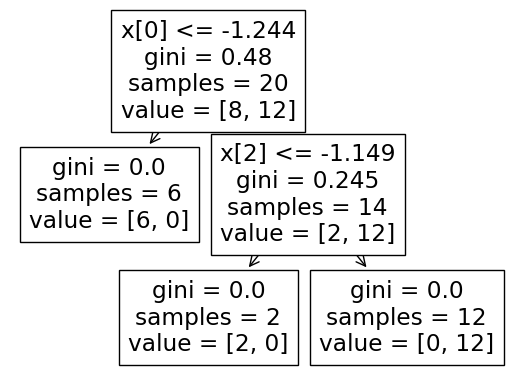

In [81]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.875, 'x[3] <= -0.748\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5, 0.625, 'x[2] <= -1.41\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= -3.036\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

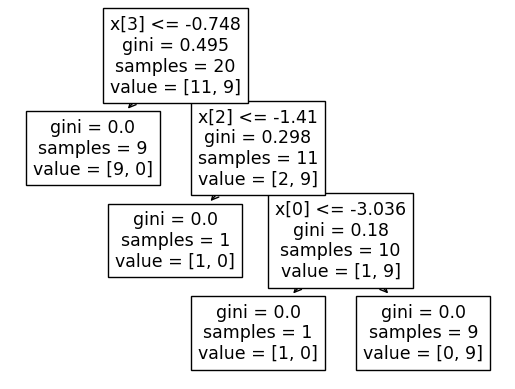

In [82]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[3] <= 1.426\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.4, 0.625, 'x[4] <= 1.183\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.375, 'x[2] <= -1.034\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]')]

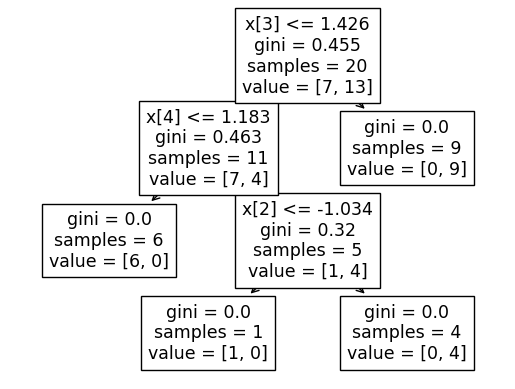

In [83]:
plot_tree(clf3)

In [89]:
clf1.predict(np.array([1.238172,1.690419,-2.842286,-2.779595,-0.635744]).reshape(1,5))

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [90]:
clf2.predict(np.array([1.238172,1.690419,-2.842286,-2.779595,-0.635744]).reshape(1,5))

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [92]:
clf3.predict(np.array([1.238172,1.690419,-2.842286,-2.779595,-0.635744]).reshape(1,5))

E:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# You can do the same process for sample_feature and combine sample